In [23]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Look at the big picture
The objective of this project is to create two models that would **predict a wine's quality** (regression model) based on its attributes and **classify it as either a good or bad wine** (classification model). 

## Framing the problem
This project is going to be **supervised learning** since our data have labels. We will perform both a **classification and regression task** because we want to know the wine quality and classify it either as good or bad.

# Get the data

First, let's read the data and take a look at its data structure.

In [24]:
# Read the data
df = pd.read_csv('winequality-red.csv', sep=';')

# Taking a quick look at the data structure
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Each row represents a wine and there are a total of **1599** rows. There are **12** attributes and the `quality` is our target variable. Let's define what each of these attributes are.

1. `fixed acidity` - set of low volatility acids that do not vaporize easily
2. `volatile acidity` - the amount of acetic acid (vinegar) in wine, which at too high of levels can lead to an unpleasant, vinegar taste
3. `citric acid`- citric acid can be added to wines to increase acidity and give a "fresh" flavor
4. `residual sugar`- the amount of sugar remaining in a wine after fermentation finishes; the more residual sugar remains, the sweeter the wine
5. `chlorides` - the amount of salt in the wine; contributes to potential salty taste of a wine
6. `free sulfur dioxide` - the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion
7. `total sulfur dioxide` - amount of free and bound forms of SO2; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2
8. `density` - how much more dense a wine is relative to water (depends on the alcohol percentage and sugar content)
9. `pH` - how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic)
10. `sulphates` - a wine additive which can contribute to sulfur dioxide gas (SO2) levels
11. `alcohol` - alcohol content of the wine
12. `quality` - target variable (0-10)

Next, let's take a look at its basic info and stats.

In [25]:
# Quick description of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


We can see that all the attributes have the same number of non-null values, which means that there are no missing data. Furthermore, the attributes are mostly continuous, numeric data.

Next, let's see a summary of the numerical attributes.

In [26]:
# Summary of numerical attributes
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Let's do another way to get a feel of the type of data we are dealing with by plotting a histogram for each of the numerical attribute.

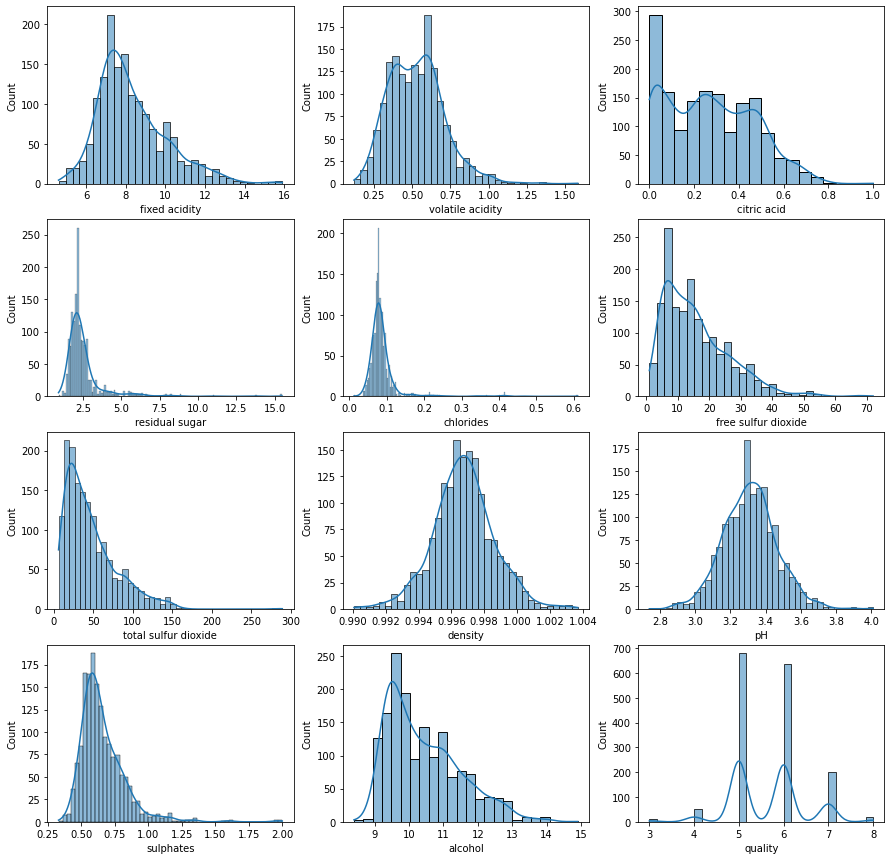

In [27]:
fig = plt.figure(figsize=(15, 15))
for idx, col in enumerate(df.columns):
    plt.subplot(4, 3, idx+1)
    sns.histplot(data=df, x=col, kde=True)

We can observe here that most of the histograms are right-skewed. That's an indiciation of having outliers. This may make it a bit harder for some Machine Learning algorithms to detect patterns, but it is not always a problem. In fact, outliers sometimes can be helpful indicators. We can confirm the existence of outliers by plotting box and whisker plots.

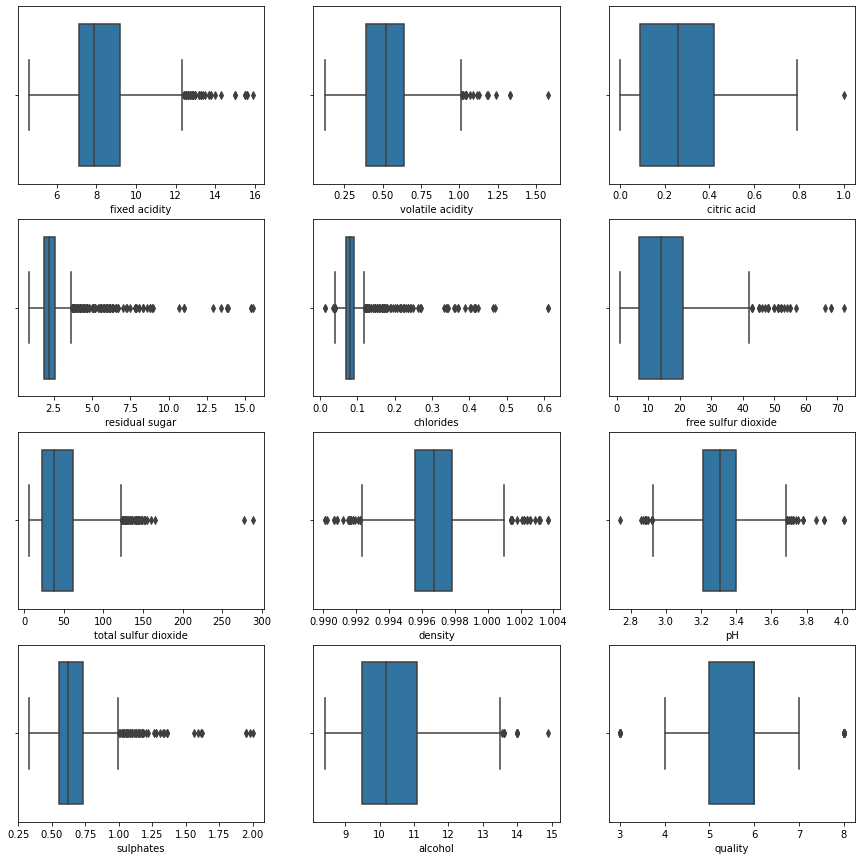

In [28]:
fig = plt.figure(figsize=(15, 15))
for idx, col in enumerate(df.columns):
    plt.subplot(4, 3, idx+1)
    sns.boxplot(x=df[col])

# Exploratory data analysis

Let's now measure the correlation of each attribute with the `quality` of wine.

In [29]:
corr = df.corr()
corr['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

NOTE: A correlation coefficient closer to 1 means that there is a strong positive correlation, and closer to -1 means that there is a strong negative correlation.<br><br>
The following attributes demonstrates having a positive correlation with `quality`.
1. alcohol (0.48, moderate) 
2. sulphates (0.25, weak)
3. citric acid (0.23, weak)
4. fixed acidity (0.12, very weak)

On the other hand, these attributes have a negative correlation with `quality`.
1. chlorides (-0.13, very weak)
2. density (-0.17, very weak)
3. total sulfur dioxide (-0.19, very weak)
4. volatile acidity (-0.39, moderate)

Meanwhile, `residual sugar` (0.01), `free sulfur dioxide` (-0.05), and `pH` (-0.06) do not play much part in influencing `quality`.

We can also create a correlation plot between each features.

<AxesSubplot:>

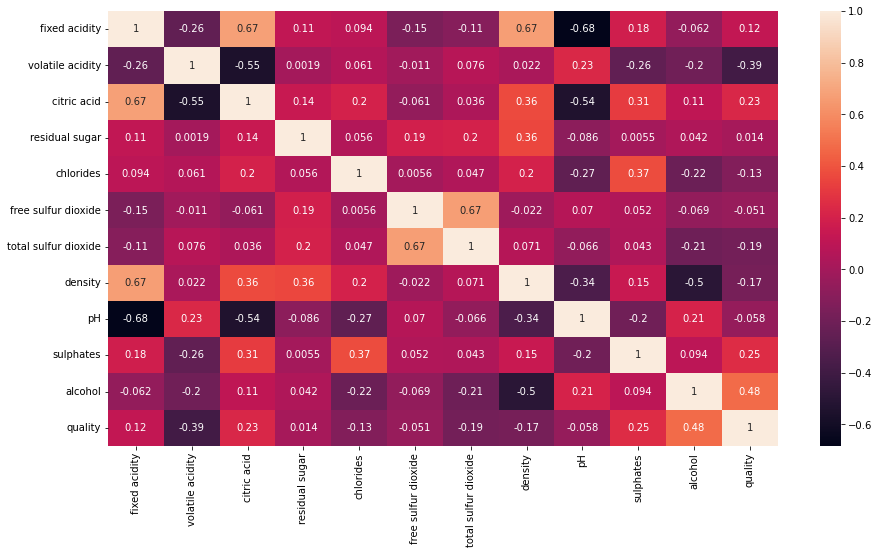

In [30]:
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)

# Prepare the data for machine learning algorithms

Let's split the data for regression task into training and test set.

In [31]:
from sklearn.model_selection import train_test_split

reg_x = df.drop('quality', axis=1)
reg_y = df['quality']

# Split into training and test set
reg_x_train, reg_x_test, reg_y_train, reg_y_test = train_test_split(reg_x, reg_y, test_size=0.20, random_state=42)

Then, let's create a modified copy of the original data that will be used later for classfication task.

In [32]:
clf_data = df.copy()

bins = [0, 5, 10] # (0, 5] < (5, 10]
clf_data['quality'] = pd.cut(clf_data['quality'], bins=bins, labels=['bad', 'good']) # 1-5: bad, 6-10: good
clf_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,bad
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,bad
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,good
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,bad
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,good
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,good
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,bad


After that, let's encode categorical data into numerical data.

In [33]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
clf_data['quality']= le.fit_transform(clf_data['quality'])

Then, split data for clasification task into training and test set.

In [34]:
clf_x = clf_data.drop('quality', axis=1)
clf_y = clf_data['quality']
clf_x_train, clf_x_test, clf_y_train, clf_y_test = train_test_split(clf_x, clf_y, test_size=0.20, random_state=42)

Finally, let's scale the attributes using a `StandardScaler`.

In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Regression train data
scaled_reg_x_train = scaler.fit_transform(reg_x_train)
scaled_reg_x_train = pd.DataFrame(scaled_reg_x_train, columns=reg_x_train.columns)

# Regression test data
scaled_reg_x_test = scaler.fit_transform(reg_x_test)
scaled_reg_x_test = pd.DataFrame(scaled_reg_x_test, columns=reg_x_test.columns)

# Classification train data
scaled_clf_x_train = scaler.fit_transform(clf_x_train)
scaled_clf_x_train = pd.DataFrame(scaled_clf_x_train, columns=clf_x_train.columns)

# Classification test data
scaled_clf_x_test = scaler.fit_transform(clf_x_test)
scaled_clf_x_test = pd.DataFrame(scaled_clf_x_test, columns=clf_x_test.columns)

Plot the data distribution again to check if data is scaled properly.

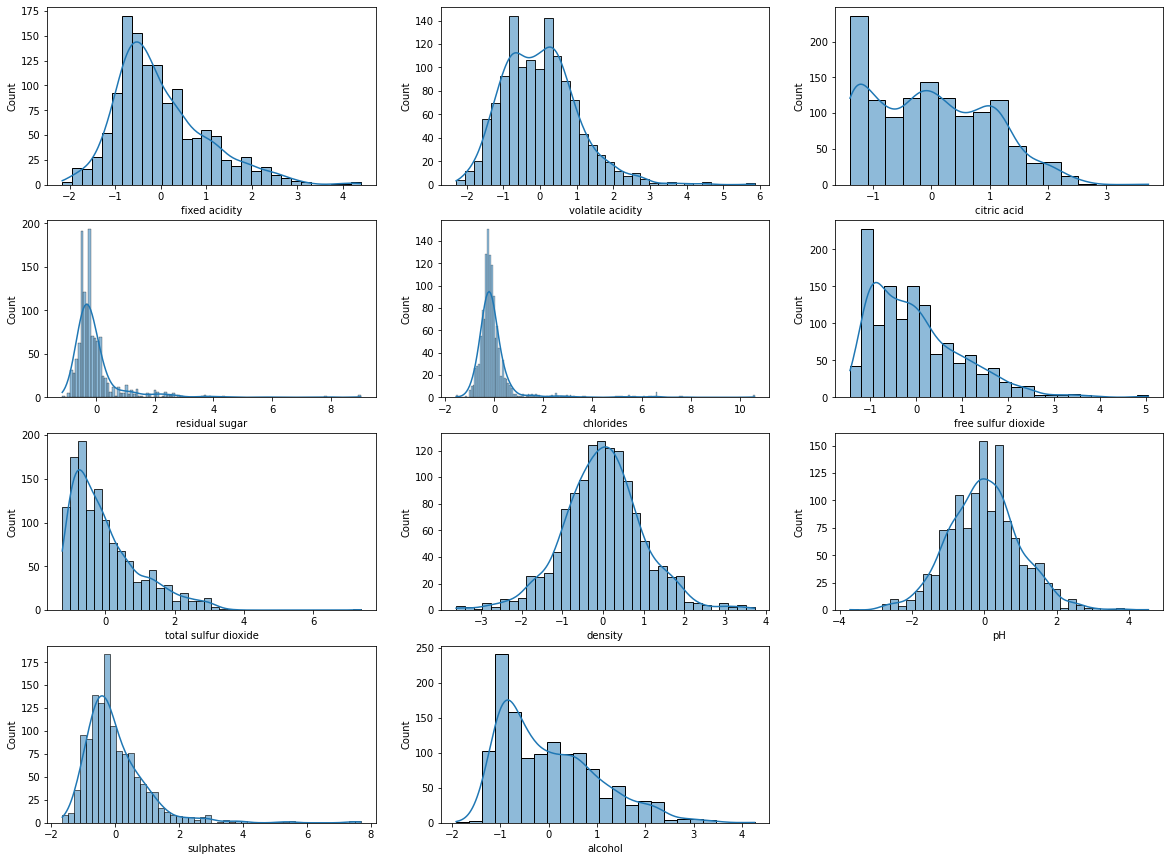

In [36]:
fig = plt.figure(figsize=(20, 15))
for idx, col in enumerate(scaled_reg_x_train.columns):
    plt.subplot(4, 3, idx+1)
    sns.histplot(data=scaled_reg_x_train, x=col, kde=True)

# Select a model and train it

## Linear regression
Let's now try to fit a linear regression model to our data.

In [37]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(scaled_reg_x_train, reg_y_train)

LinearRegression()

Then, compare the predictions made by the model with actual target values.

In [38]:
reg_train_data = scaled_reg_x_train.iloc[:5]
reg_train_labels = reg_y_train.iloc[:5]
print("Predictions:", lin_reg.predict(reg_train_data))
print("Labels:", list(reg_train_labels))

Predictions: [5.68864364 6.05664943 5.69269687 5.11164627 4.79907142]
Labels: [6, 6, 6, 5, 5]


In [39]:
reg_test_data = scaled_reg_x_test[:5]
reg_test_labels = reg_y_test[:5]
print("Predictions:", lin_reg.predict(reg_test_data))
print("Labels:", list(reg_test_labels))

Predictions: [5.31604945 5.01510456 5.68127734 5.42850337 5.69164445]
Labels: [6, 5, 6, 5, 6]


Let's measure the performance of our model using mean squared error, mean absolute error, and r<sup>2</sup>.

In [40]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

reg_predicitons = lin_reg.predict(scaled_reg_x_test)
print('MSE:', mean_squared_error(reg_y_test, reg_predicitons))
print('MAE:', mean_absolute_error(reg_y_test, reg_predicitons))
print('R-squared:', r2_score(reg_y_test, reg_predicitons))

MSE: 0.39078829344525534
MAE: 0.5005747251046339
R-squared: 0.40201256371442873


Based on the performance metrics results, the linear regression model performs quite good enough. The error between the data points and the regression model is small (as calculated using the MSE and MAE). Finally, around 40% of the variability in wine quality (dependent variable) is explained by the linear regression model.

## Support Vector Machine Classifier
For our classification task, we will fit a SVM Classifier model to our data.

In [41]:
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(scaled_clf_x_train, clf_y_train)

SVC()

Then, compare the predictions made by the model with actual target values.

In [42]:
clf_train_data = scaled_clf_x_train[:5]
clf_train_labels = clf_y_train[:5]
print("Predictions:", svm_clf.predict(clf_train_data))
print("Labels:", list(clf_train_labels))

Predictions: [1 1 1 0 0]
Labels: [1, 1, 1, 0, 0]


In [43]:
clf_test_data = scaled_clf_x_test[:5]
clf_test_labels = clf_y_test[:5]
print("Predictions:", svm_clf.predict(clf_test_data))
print("Labels:", list(clf_test_labels))

Predictions: [0 0 1 0 1]
Labels: [1, 0, 1, 0, 1]


Let's measure the performance of our model using accuracy score and confusion matrix.

In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix

clf_predictions = svm_clf.predict(scaled_clf_x_test)
print('Accuracy:', accuracy_score(clf_y_test, clf_predictions))
print('Confusion matrix:\n', confusion_matrix(clf_y_test, clf_predictions))

Accuracy: 0.765625
Confusion matrix:
 [[109  32]
 [ 43 136]]


The SVM Classifier reached an accuracy of around 76.56% which means that 76.56% of the time, the SVM Classifier model makes a correct prediction, which is quite good.